# Prepare Data

In [1]:
from pandas import read_csv

filename = 'diabetes.csv'
data = read_csv(filename)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
array = data.values
x = array[:,0:-1]
y = array[:,-1]

In [4]:
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(x)

In [6]:
print(rescaledX)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(rescaledX, y, test_size = 0.2)

# Create Models

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = []
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

# Compare Machine Learning Algorithms

**1. Scoring = Accuracy**

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results_acc = []
names_acc = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model, rescaledX, y, cv=kfold, scoring=scoring)
  results_acc.append(cv_results)
  names_acc.append(name)
  msg = "%s: %f" % (name, cv_results.mean())
  print(msg)

DTC: 0.696531
KNN: 0.744754
SVM: 0.770830


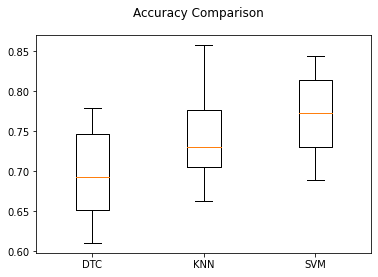

In [10]:
from matplotlib import pyplot

fig = pyplot.figure()
fig.suptitle('Accuracy Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results_acc)
ax.set_xticklabels(names_acc)
pyplot.show()

Best Result : SVM

**2. Scoring = Precision**

In [11]:
results_prec = []
names_prec = []
scoring = 'precision'
for name, model in models:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model, rescaledX, y, cv=kfold, scoring=scoring)
  results_prec.append(cv_results)
  names_prec.append(name)
  msg = "%s: %f" % (name, cv_results.mean())
  print(msg)

DTC: 0.566992
KNN: 0.668540
SVM: 0.727744


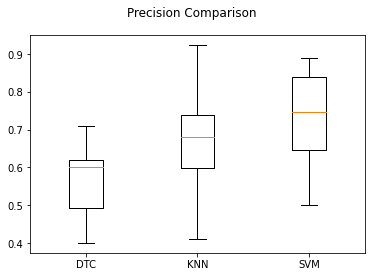

In [12]:
fig = pyplot.figure()
fig.suptitle('Precision Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results_prec)
ax.set_xticklabels(names_prec)
pyplot.show()

Best Result : SVM

**3. Scoring = Specificity**

In [13]:
from sklearn.metrics import confusion_matrix

results_spec = []
names_spec = []
for name, model in models:
  kfold = KFold(n_splits=10)
  model.fit(x_train, y_train)
  predicted = model.predict(x_test)
  matrix = confusion_matrix(y_test, predicted)
  TN = matrix[0][0]
  FP = matrix[0][1]
  spec_results = (TN / float(TN + FP))
  results_spec.append(spec_results)
  names_spec.append(name)
  msg = "%s: %f" % (name, spec_results)
  print(msg)

DTC: 0.759615
KNN: 0.875000
SVM: 0.894231


Best Result : SVM

# SVM Model

In [14]:
best_model = SVC()
best_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
best_result = best_model.predict(x_test)
print(best_result)

[0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.]


In [16]:
kfold = KFold(n_splits=10)
scoring = 'accuracy'
kfold_best_results = cross_val_score(best_model, rescaledX, y, cv=kfold, scoring=scoring)
print(kfold_best_results.mean())

0.7708304853041694
